In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,Dropout
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
!pip install keras

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
##loading the image

In [6]:
from PIL import Image
rel_dir = "/storage/"
#rel_dir = ""

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.layers import AveragePooling2D
from keras.preprocessing import image
import numpy as np

In [9]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=True
)

# We'll extract features at the final pool layer.
model = Model(
    inputs=base_model.input,
    outputs=base_model.get_layer('avg_pool').output
)
def extract_image(image_path,model):
        img = image.load_img(image_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        return features[0]

In [8]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [27]:
labels = []
image_features = []

labels_test = []
image_features_test = []

for label in os.listdir(rel_dir+"/split_images"):
    listdir = np.array(sorted(os.listdir(rel_dir+"/split_images/"+label),key=lambda x: int(x.split(".")[0])))
    print(label,len(listdir))
    batch_sz = 100
    features = []
    labs = []
    for file in listdir:
        features.append(np.array(extract_image(rel_dir+"/split_images/"+label+'/'+file,model)))
        labs.append(label)
    print("Done processing features")
    X_train,X_test,y_train,y_test = train_test_split(features,labs,shuffle=False,test_size=0.3)
    image_features = image_features + X_train
    labels = labels + y_train
    
    labels_test = labels_test + y_test
    image_features_test = image_features_test + X_test

Aug 11th Decaying Ice 2439
Done processing features
Sept 5th Helicopter 1490
Done processing features
Aug 28th Stopped Ram Ice 2979
Done processing features
Aug 15th Ice Under Pressure 1265
Done processing features
Discoloured Ice 676
Done processing features
Aug 16th-17th Helicopter 1309
Done processing features
Aug 20th-26th 1213
Done processing features
Aug 14th Decaying 1106
Done processing features
Sept 8th Swell 1862
Done processing features
Aug 29th-30th 3536
Done processing features
Aug 10th Decaying Ice Stopped Luis 2279
Done processing features


In [32]:
num_labels = len(np.unique(labels))

In [33]:
image_f = np.array(image_features)
image_f_test = np.array(image_features_test)

In [34]:
num_of_train_examples = image_f.shape
print(num_of_train_examples)

(14105, 2048)


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [36]:
le.fit(list(labels)+list(labels_test))
le_labels = le.transform(labels)
le_labels_test = le.transform(labels_test)
one = preprocessing.OneHotEncoder()
one.fit(list(le_labels.reshape(-1,1))+list(le_labels_test.reshape(-1,1)))
one_labels = one.transform(le_labels.reshape(-1,1))
one_labels_test = one.transform(le_labels_test.reshape(-1,1))

In [37]:
image_input = Input(shape=(2048,))
output = Dense(num_labels,activation='softmax')(image_input)
model_dense = Model(image_input, output)
model_dense.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model_dense.save_weights('inception-simple-model.h5')

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
validation_cvscores = []
test_cvscores = []
epochs = 1
for train, test in kf.split(image_f):
    model_dense.load_weights('inception-simple-model.h5')
    hist = model_dense.fit(image_f[train], one_labels[train], epochs=5, verbose=1)
    print(hist.history)
    val_score = model_dense.evaluate(image_f[test], one_labels[test], verbose=0)
    test_score = model_dense.evaluate(image_f_test, one_labels_test, verbose=0)
    validation_cvscores.append(val_score)
    test_cvscores.append(test_score)

Epoch 1/5
12694/12694 [==============================] - 3s 242us/step - loss: 0.1464 - acc: 0.9710
Epoch 2/5
12694/12694 [==============================] - 2s 120us/step - loss: 6.0354e-05 - acc: 1.0000
Epoch 3/5
12694/12694 [==============================] - 2s 119us/step - loss: 1.2419e-06 - acc: 1.0000
Epoch 4/5
12694/12694 [==============================] - 1s 117us/step - loss: 2.9731e-07 - acc: 1.0000
Epoch 5/5
12694/12694 [==============================] - 1s 116us/step - loss: 1.9149e-07 - acc: 1.0000
{'acc': [0.9710099259492674, 1.0, 1.0, 1.0, 1.0], 'loss': [0.14644413361561526, 6.03539251204593e-05, 1.2418730268053258e-06, 2.9730618746795737e-07, 1.9149201749151028e-07]}
Epoch 1/5
12694/12694 [==============================] - 2s 122us/step - loss: 0.1395 - acc: 0.9742
Epoch 2/5
12694/12694 [==============================] - 2s 123us/step - loss: 8.0100e-05 - acc: 1.0000
Epoch 3/5
12694/12694 [==============================] - 2s 119us/step - loss: 1.5690e-06 - acc: 1.0000
E

In [45]:
np.array(validation_cvscores)[:,1]*100

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [40]:
np.array(test_cvscores)[:,1]*100

array([69.03620433, 67.96164655, 69.2841792 , 70.01157216, 68.60638122,
       69.66440734, 69.4825591 , 69.4825591 , 69.49909076, 69.03620433])

In [49]:
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
print(np.array(validation_cvscores)[:,1]*100)
print(np.array(test_cvscores)[:,1]*100)
print(np.mean(np.array(validation_cvscores)[:,1]*100))
print(np.mean(np.array(test_cvscores)[:,1]*100))
print(np.std(np.array(validation_cvscores)[:,1]*100))
print(np.std(np.array(test_cvscores)[:,1]*100))

[100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00 100.00]
[69.04 67.96 69.28 70.01 68.61 69.66 69.48 69.48 69.50 69.04]
100.0
69.20648040998513
0.0
0.5540473680825306


In [46]:
print("Validation Standard Deviation",np.std(validation_cvscores))
print("Test Standard Deviation",np.std(test_cvscores))

Validation Standard Deviation 0.49999988176552435
Test Standard Deviation 1.0894991999139847


In [47]:
plt.plot(np.arange(epochs*num_of_batches),loss_values)
plt.title("Learning Curve")
plt.xlabel('Subsequent Batches')
plt.ylabel('Categorial Cross Entropy')

NameError: name 'num_of_batches' is not defined

NameError: name 'images_to_show' is not defined

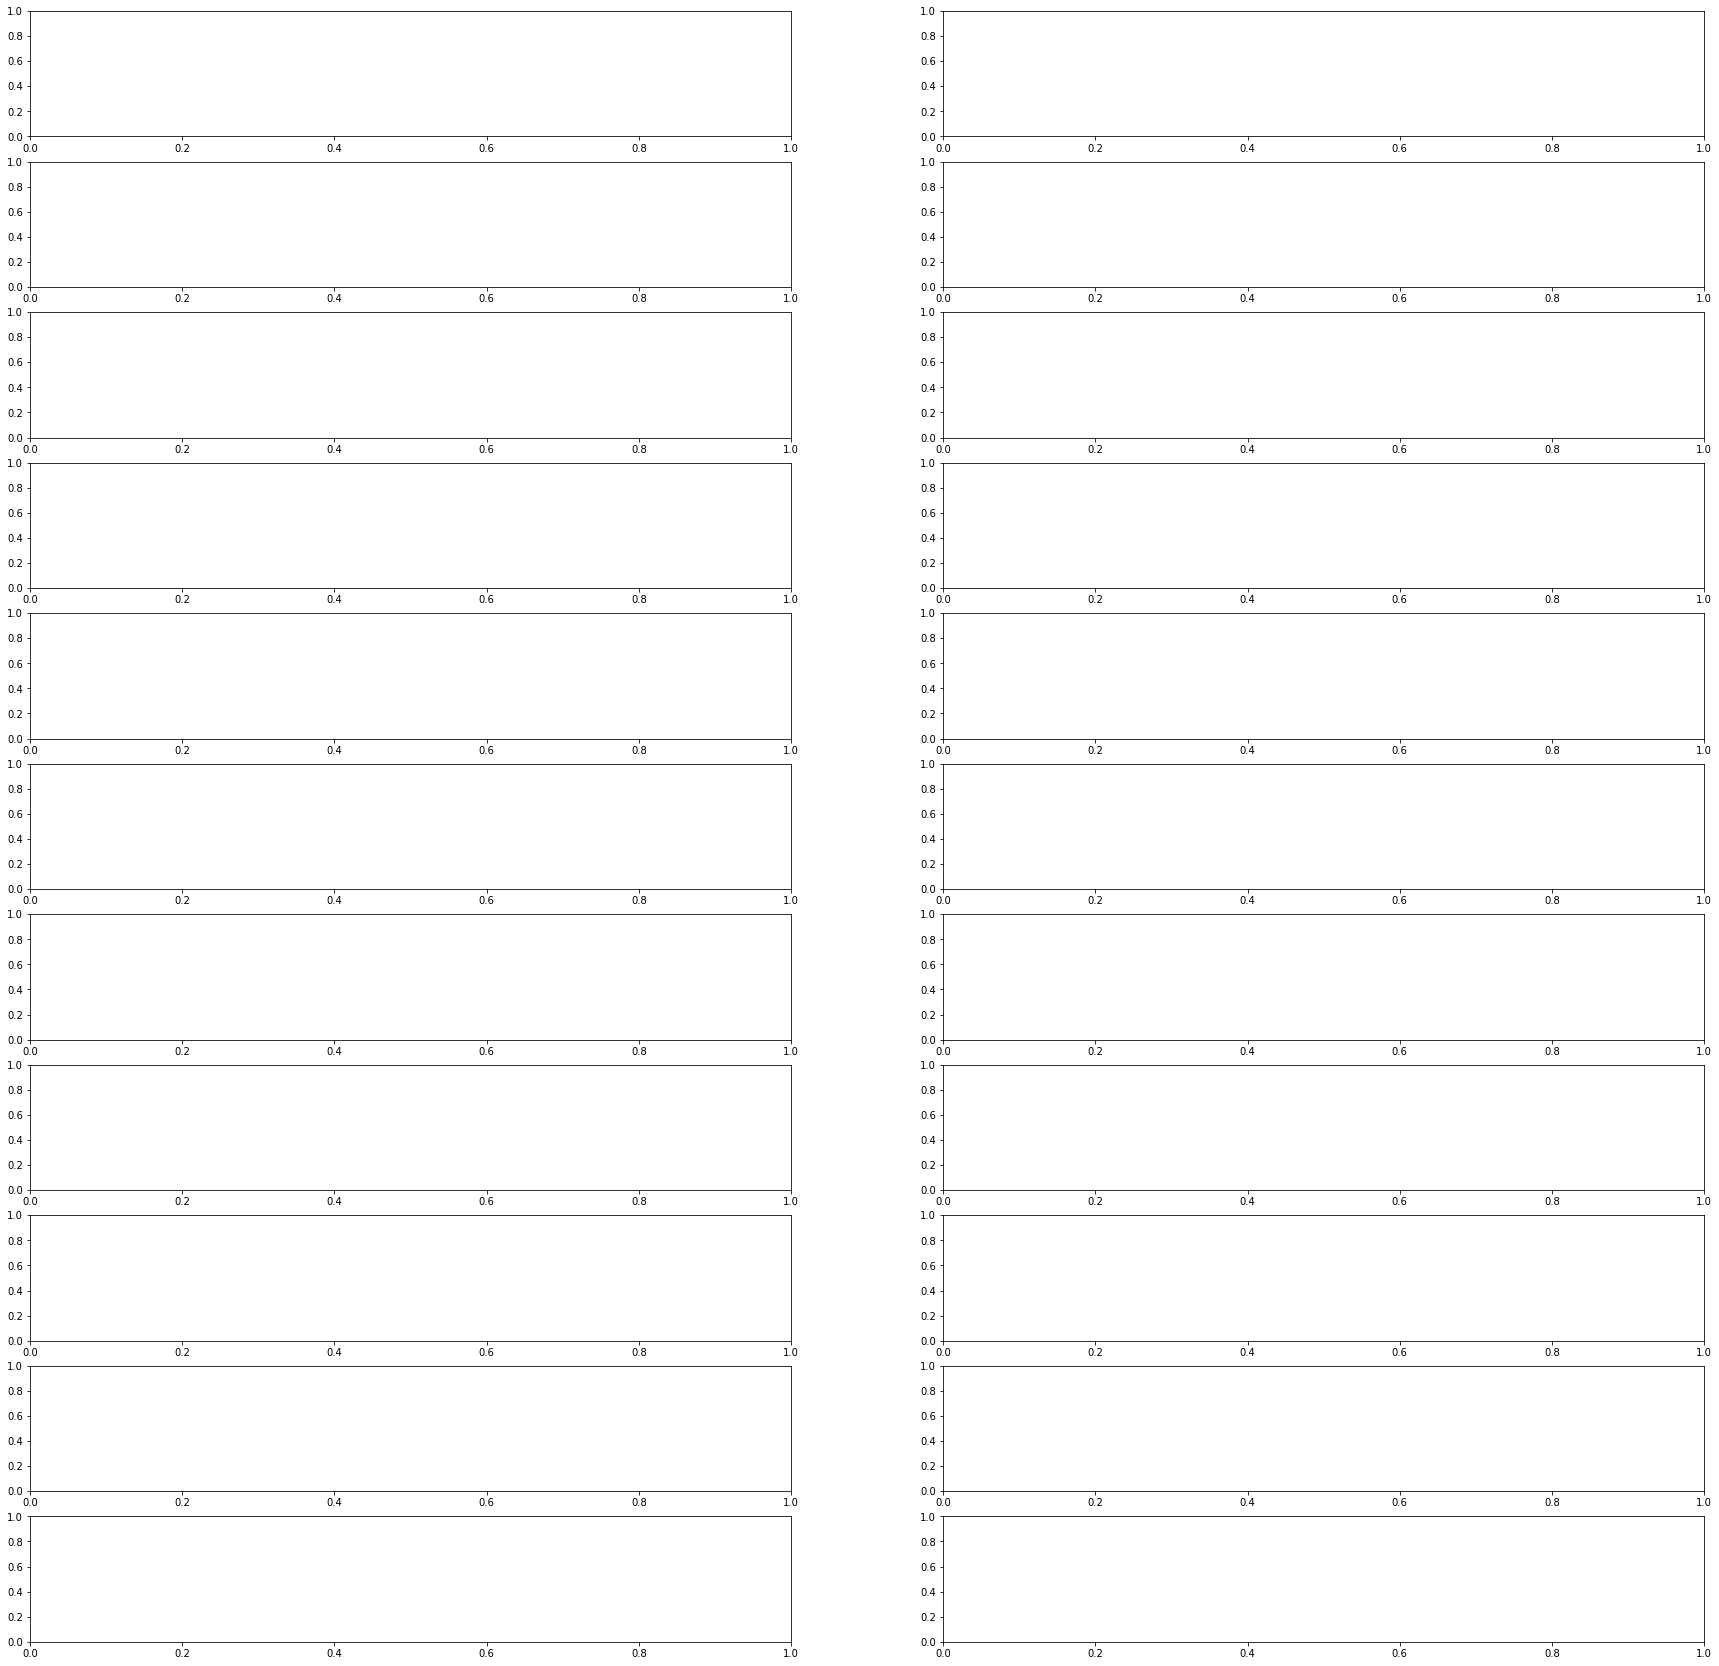

In [48]:
f, axarr = plt.subplots(num_labels,2)
f.set_figheight(30)
f.set_figwidth(30)
for i in range(num_labels):
    axarr[i,0].imshow(mpimg.imread(images_to_show[i][0]))
    axarr[i,0].title.set_text("train "+images_to_show[i][2])
    axarr[i,1].imshow(mpimg.imread(images_to_show[i][1]))
    axarr[i,1].title.set_text("test "+images_to_show[i][2])
plt.show()
plt.savefig('transferlearning.png')
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# image = mpimg.imread(images[0])
# plt.imshow(image)
# plt.show()